# Linear regression motivation

In this part, we are going to see:
1. Explore a dataset.
2. What a linear model is, and how to create some of them.
3. How to choose the best one.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## The problem

In [3]:
data = pd.read_csv("../data/hours_vs_mark.csv", index_col=0)

We have 100 students, and we know:
 * how many hours they studied for their exam
 * what mark they got (0 to 100)

We would like to understand the relationship (the marks as a function of the studied hours) $$mark = f(hours)$$

So that we can **predict the expected mark** we will get by studying a given number of hours

## Data exploration

### Exercise!

What function do you use for describing a dataset?

In [5]:
data.describe()

,hours,mark
count,100.000000,100.000000
mean,428.540000,47.940000
std,285.241752,27.757907
min,2.000000,0.000000
25%,167.250000,29.500000
50%,424.500000,44.000000
75%,662.500000,68.000000
max,986.000000,100.000000


### Exercise:

Explore the dataset by doing two histograms, one for each of the two variables.

<AxesSubplot:xlabel='hours', ylabel='Count'>

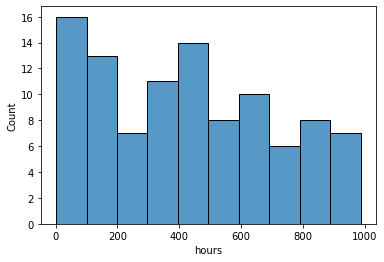

In [6]:
sns.histplot(data.hours, bins=10)

<AxesSubplot:xlabel='mark', ylabel='Count'>

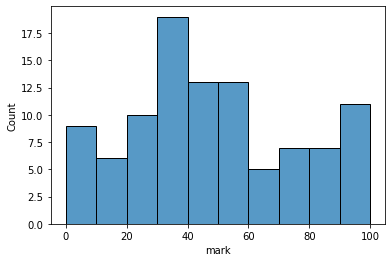

In [7]:
sns.histplot(data.mark, bins=10)

### Exercise

Further explore the dataset by plotting a scatter plot for the two variables.

<AxesSubplot:xlabel='hours', ylabel='mark'>

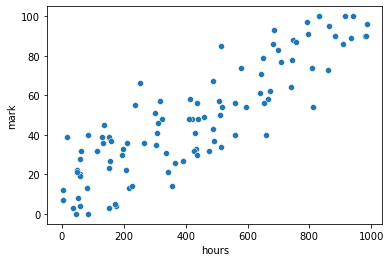

In [8]:
sns.scatterplot(x=data['hours'], y=data['mark'])

What it looks like?

It looks like: _The more you study, the better you do on the exam_.

## First approximations: the (basic) linear model

Lets try a linear regression $$Y = m * X + n$$

$m$ is the slope  
$n$ is the value of $Y$ when $X=0$ 

$$mark = m * hours + n$$

###  model 1

In [9]:
data.head()

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86


In [10]:
# supongo que: cada hora de estudio, representa 0.1 puntos de la nota
data['prediction_1'] = data.hours * 0.1
#         Y          =     X      *  m  + 0

In [11]:
data.head()

,hours,mark,prediction_1
0,865,95,86.5
1,4,12,0.4
2,305,35,30.5
3,437,56,43.7
4,682,86,68.2


### model 2

In [28]:
# supongo que: cada hora de estudio son 0.12 puntos de la nota, pero 
# siempre saco 10 puntos más de lo que estudio

data['prediction_2'] = data.hours * 0.3 + 10
#         Y          =     X      *  m   +  n

In [29]:
data.head()

,hours,mark,prediction_1,prediction_2,error_1,error_2
0,865,95,86.5,269.5,8.5,18.80
1,4,12,0.4,11.2,11.6,1.52
2,305,35,30.5,101.5,4.5,11.60
3,437,56,43.7,141.1,12.3,6.44
4,682,86,68.2,214.6,17.8,5.84


### Errors

In [30]:
data['error_1'] = (data.mark - data.prediction_1).abs()

In [31]:
data['error_2'] = (data.mark - data.prediction_2).abs()

In [32]:
data.head()

,hours,mark,prediction_1,prediction_2,error_1,error_2
0,865,95,86.5,269.5,8.5,174.5
1,4,12,0.4,11.2,11.6,0.8
2,305,35,30.5,101.5,4.5,66.5
3,437,56,43.7,141.1,12.3,85.1
4,682,86,68.2,214.6,17.8,128.6


So which one is better?

In [33]:
data.error_1.mean()

12.675999999999998

In [34]:
data.error_2.mean()

91.26800000000001

Model 1 performs (predicts) better (on average)!

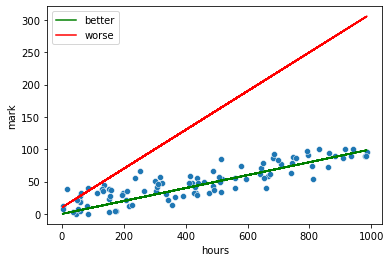

In [35]:
fig, ax = plt.subplots(1,1)

sns.scatterplot(x=data.hours, y=data.mark, ax=ax)

ax.plot(data.hours, data.prediction_1, color='g', label='better')
ax.plot(data.hours, data.prediction_2, color='r', label='worse')

plt.legend()

But, to get a good prediction, do we need to create look at the data and guess the model each time?

# The optimal linear model

Can we find the **best**?

`scikit-learn` is a Python library for building ML models.

Linear regression is now called a ML algorithm (years ago it was only basic statistical inference... you know, the hype)

In [ ]:
!pip install scikit-learn

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

optimal_m = lr.fit(X = data[["hours"]], y = data.mark).coef_[0]
optimal_n = lr.fit(X = data[["hours"]], y = data.mark).intercept_

data["best_prediction"] = data.hours * optimal_m + optimal_n

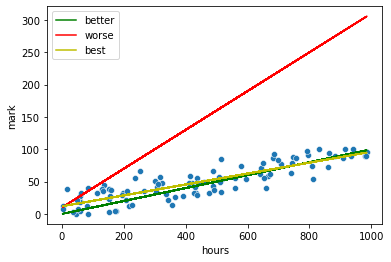

In [40]:
fig, ax = plt.subplots()
sns.scatterplot(x=data["hours"], y=data["mark"])

plt.plot(data.hours, data.prediction_1, color='g', label='better')
plt.plot(data.hours, data.prediction_2, color='r', label='worse')
plt.plot(data.hours, data.best_prediction, color='y', label='best')

plt.legend()

# What's really a linear regression model?

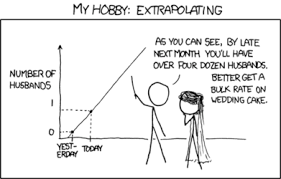

In [41]:
%%capture
!pip install statsmodels
!pip install sklearn

In [42]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import pandas as pd
np.random.seed(123)

/Users/palozano/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Simple linear regression

Simple linear regression an statistical model that assumes a linear relationship between one predictor and one target variable. Mathematically, this can be expressed as:

 $$ Y = \beta_0 +  \beta_1 X + \epsilon$$
 
 Equivalently:
  $$ Y = n +  m * X + \epsilon$$

Where:
 * $X$ = predictor variable
 * $Y$ = target variable
 * $\beta_0$ = intercept
 * $\beta_1$ = slope
 * $\epsilon$ = noise (Gaussian)


The above equation is known as the *population regression line*.

In [43]:
# Obtain random, dummy data for these exercises
# (similar to the motivation example)

# number of data points
num_points = 100

# parameters: I set them with the values that I want
beta_0 = 12    # this is the 10 from the example above
beta_1 = 0.08  # this is the 0.12 from the example above

# generate random study hours
X = np.random.normal(loc=600, scale=150, num_points)

# generate grades with some noise
y = beta_0 + (beta_1 * X) + np.random.normal(loc=0, 
                                             scale=5, 
                                             size=num_points)

data = pd.DataFrame({'grade': y, 'hours': X})

In [45]:
data.head()

,grade,hours
0,50.182706,437.155410
1,62.078706,749.601817
2,66.957065,642.446775
3,54.915983,374.055793
4,52.933667,513.209962


In [47]:
data.describe()

,grade,hours
count,100.000000,100.000000
mean,60.227631,604.066361
std,14.365081,170.088651
min,20.916715,180.211634
25%,49.581336,475.088187
50%,59.282617,592.009540
75%,72.872691,747.508255
max,90.989738,958.854790


<AxesSubplot:xlabel='hours', ylabel='grade'>

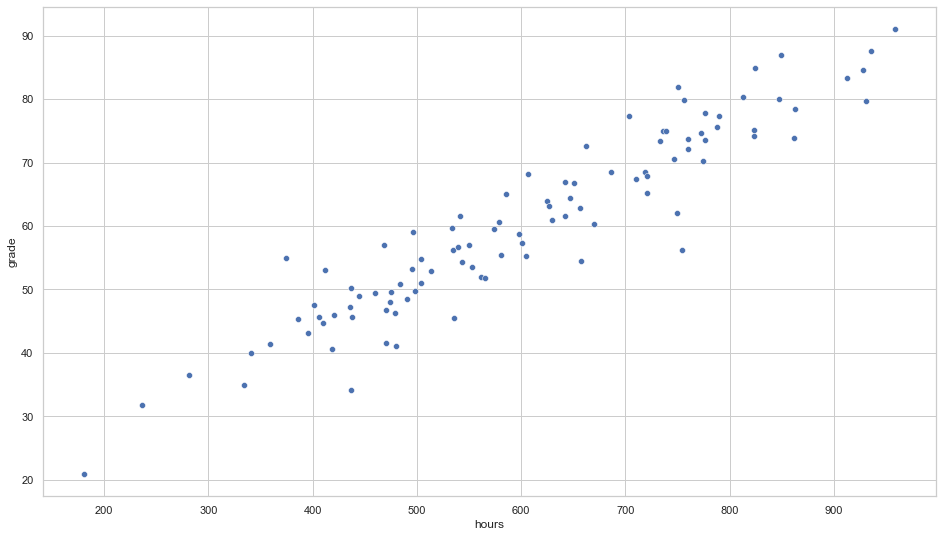

In [48]:
sns.scatterplot(x=data.hours, y=data.grade)

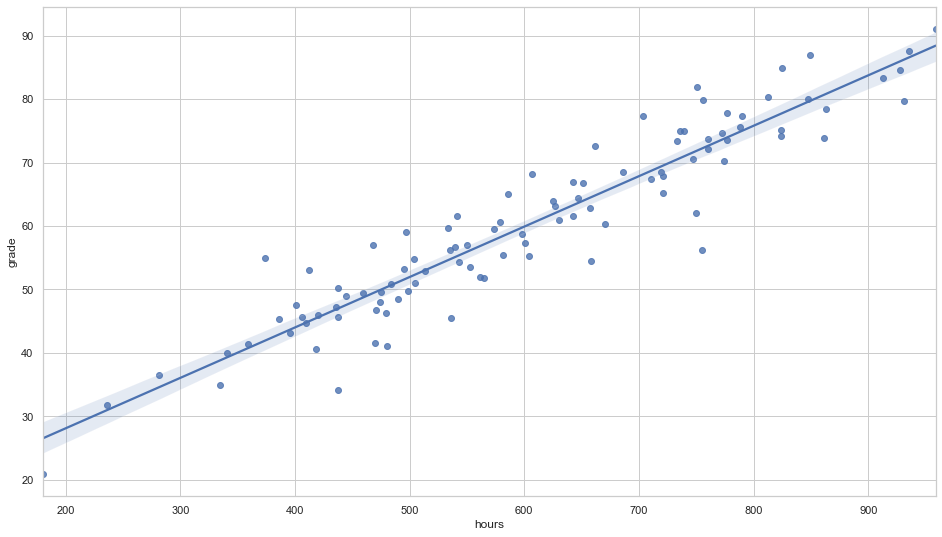

In [49]:
sns.regplot(x='hours', y='grade', data=data);

Of course, in the real life we don´t know the true parameters of the model, neither if the model is real! 

Today we´ll learn a [valuable lesson](https://en.wikipedia.org/wiki/All_models_are_wrong):



<center> <b>"All models are wrong, but some are useful"</b> </center>


In practice what we do is, after seing an scatter plot as the one above, try to infer the parameters of the model $\beta_0$ and the slope, $\beta_1$.  Once they are estimated, the estimated fit becomes $$ \hat{Y} = \hat{\beta_0} +  \hat{\beta_1} X$$

In [50]:
data

,grade,hours
0,50.182706,437.155410
1,62.078706,749.601817
2,66.957065,642.446775
3,54.915983,374.055793
4,52.933667,513.209962
...,...,...
95,56.218098,754.667169
96,45.638718,437.314813
97,43.084088,395.479268
98,62.846499,656.910092


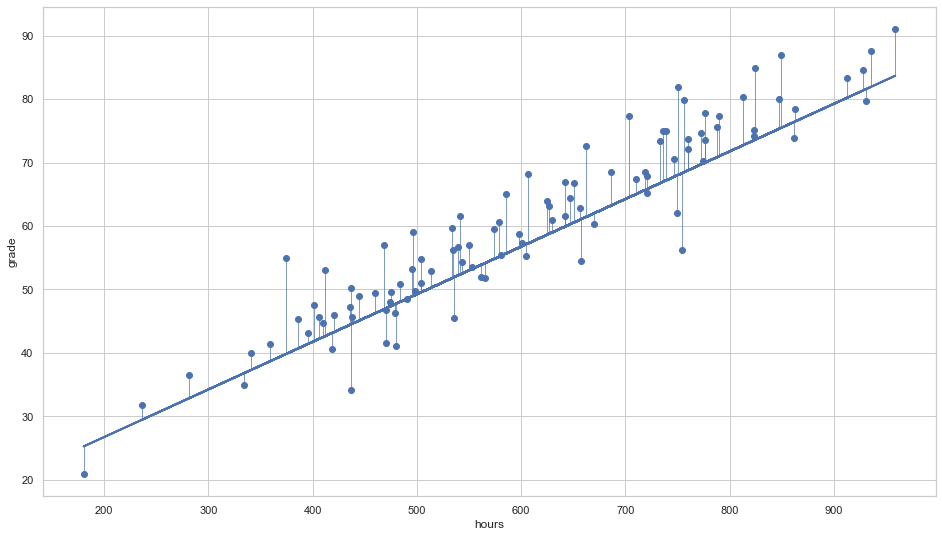

In [66]:
# suppose our estimated fit is like this:
y_hat = 11.75 + 0.075 * X

# plot the points
plt.scatter(X, y)  # plt.scatter(data.hours, data.grade)

# plot the linear regression line
plt.plot(X, y_hat, lw=2)

# labels
plt.xlabel('hours')
plt.ylabel('grade')

# distances
plt.vlines(X, y_hat, y, lw=0.7)

The numeric difference between the *least squares regression line* and the true value is called the *residual*, and represents the error in the estimate: $e = y_i  - \hat{y}$. The regression line minimized the *Residual Sum of Squares* (RSS): $$RSS = e_1^2 + e_2^2 + \dots + e_n ^2$$

 What is a bad $RSS$ intuitively?

## Exercise

1. Create a figure with two axes
2. On the left axis, plot the figure from above
3. On the right axis, do the same but the "bad" line indicated below

Text(0.5, 1.0, 'bad regression line')

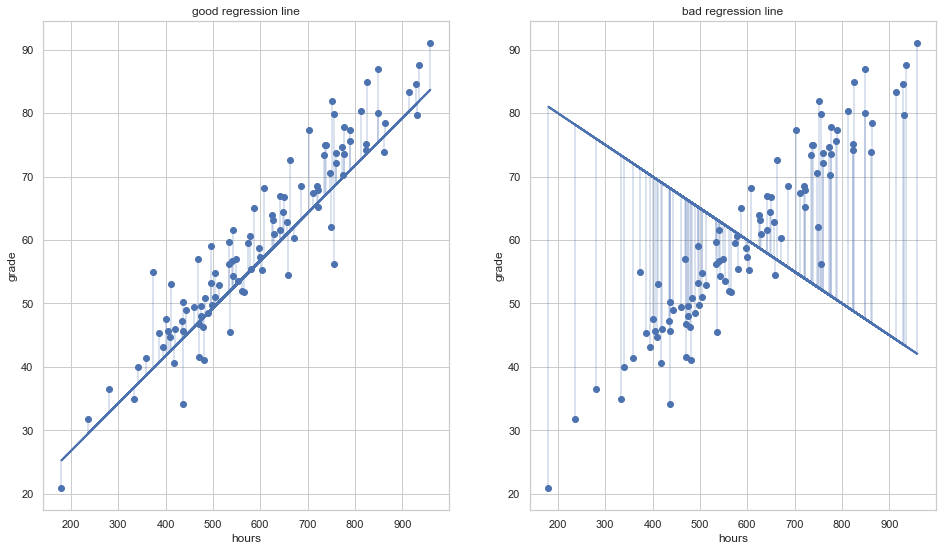

In [68]:
# create the figures
# on the left, out previous plot (you can copy paste from above)
# on the right, one badly constructed line
fig, (ax1, ax2) = plt.subplots(1, 2)


y_hat = 11.75 + 0.075 * X
ax1.scatter(X, y)
ax1.plot(X, y_hat, lw=2)
ax1.vlines(X, y_hat, y, lw=0.4)
ax1.set_xlabel('hours')
ax1.set_ylabel('grade')
ax1.set_title('good regression line')


# we do very badly with our regression line
y_hat = 90 - 0.05 * X
ax2.scatter(X, y)
ax2.plot(X, y_hat, lw=2)
ax2.vlines(X, y_hat, y, lw=0.4)
ax2.set_xlabel('hours')
ax2.set_ylabel('grade')
ax2.set_title('bad regression line')

## How do we create our fits using Python?

Use `LinearRegression` from `scikit`.

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lr = LinearRegression()

In [74]:
data = pd.read_csv("../data/hours_vs_mark.csv", index_col=0)

lr.fit(X=data.hours.to_frame(), y=data.mark)

print(lr.intercept_, lr.coef_[0])
#  n (ordenada origen), m (pendiente)

11.78070717807148 0.08437787096170372


$$Y = m * X + n $$
$$mark = m * hours + n $$

Text(0.5, 1.0, 'perfect regression line')

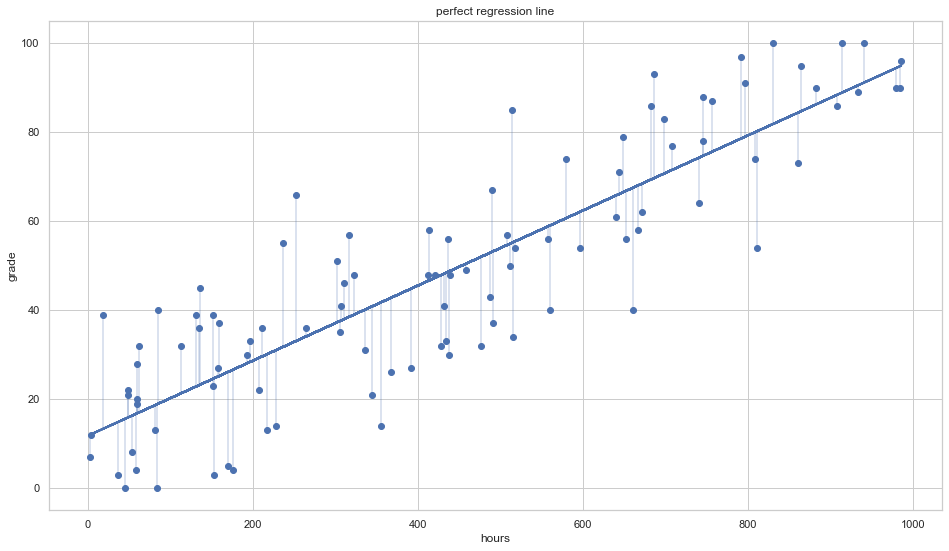

In [80]:
fig, ax1 = plt.subplots(1, 1)

# mi ajuste lineal
y_hat = lr.intercept_ + lr.coef_[0] * data.hours

# pintar los puntos
ax1.scatter(data.hours, data.mark)

# pintar la recta del ajuste
ax1.plot(data.hours, y_hat, lw=2)

# pintar las distancias de los puntos a la recta
ax1.vlines(data.hours, y_hat, data.mark, lw=0.4)

ax1.set_xlabel('hours')
ax1.set_ylabel('grade')
ax1.set_title('perfect regression line')

In [81]:
def get_mark(hours):
    mark = lr.intercept_ + lr.coef_[0] * hours
    return mark

get_mark(600)

62.407429755093716

### Exercise
Write a function that gets you the hours someone has studied as a function of the grade she obtained.

### How good is our model?
No matter how significant our parameters are... if the model is terrible! 


If just use the mean as the predicted value for each predicion, the error we would make is (*total sum of squares*):

$$TSS=\Sigma(y_i - \bar{y}_i)^2$$

We will consider this our baseline.

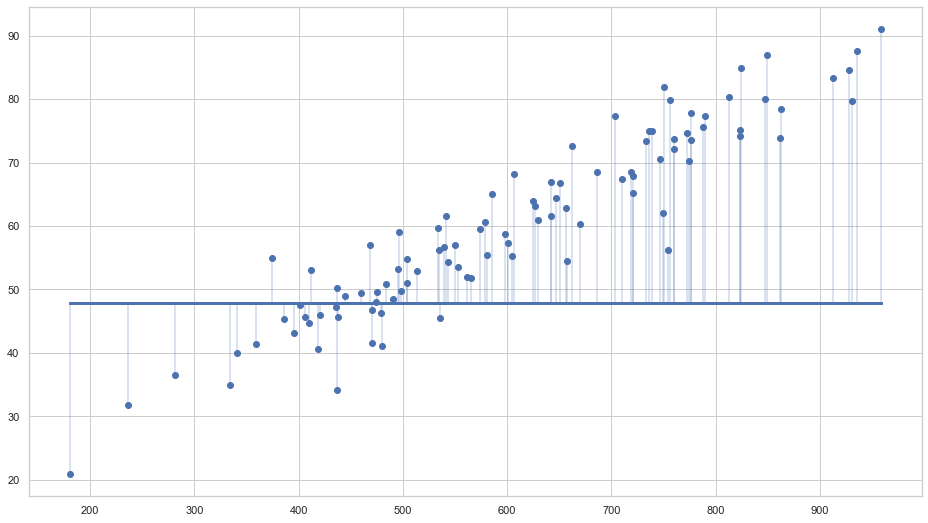

In [83]:
# show mean prediction
mean_prediction = [data.mark.mean()] * num_points

plt.scatter(X, y)
plt.plot(X, mean_prediction, lw=3)
plt.vlines(X, mean_prediction, y, lw=0.4)

## Exercise(s)!

In [84]:
# Calculate TSS for the above model
TSS = ((data.mark - mean_prediction) ** 2).sum()
TSS

76279.64

Recall that the coeficients of the linear regression minimize the $RSS=\Sigma(y_i - \hat{y_i})^2$, that is, the amount of variability that is left unexplained after performing the regression. The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination):

$$R^2 = \frac{TSS -RSS}{TSS} = 1- \frac{RSS}{TSS}$$

measures the "*proportion of variability in Y that can be explained using X*". It is a measure of the linear relationship that exists between $X$ and $y$.

**Note:** in the case of simple linear regression, the $R^2$ coefficient is just the square of the *Pearson´s* correlation coefficient.

In [85]:
# Calculate the R^2 for the model above

# Create the fit
lr.fit(X=data.hours.to_frame(), y=data.mark)

# Obtain the coefficients
beta_1 = lr.coef_[0]    # m
beta_0 = lr.intercept_  # n
    
# Write your y_hat variable (my linear fit)
y_hat = beta_0 + beta_1 * data.hours

# Compute the RSS
RSS = ((data.mark - y_hat) ** 2).sum()

# Compute the R^2 using the TSS from above
R_2 = 1 - (RSS / TSS)

In [86]:
R_2

0.7518130774464549

Este coeficiente significa: El 75% de la variación de las notas puede ser explicada usando las horas de estudio.

### Linear regression with statsmodels

To analyse linear models, we will be using the [statsmodels library](http://statsmodels.sourceforge.net/) which gives us a lot information  in a simple summary, and integrates nicely with pandas.

<AxesSubplot:xlabel='hours', ylabel='mark'>

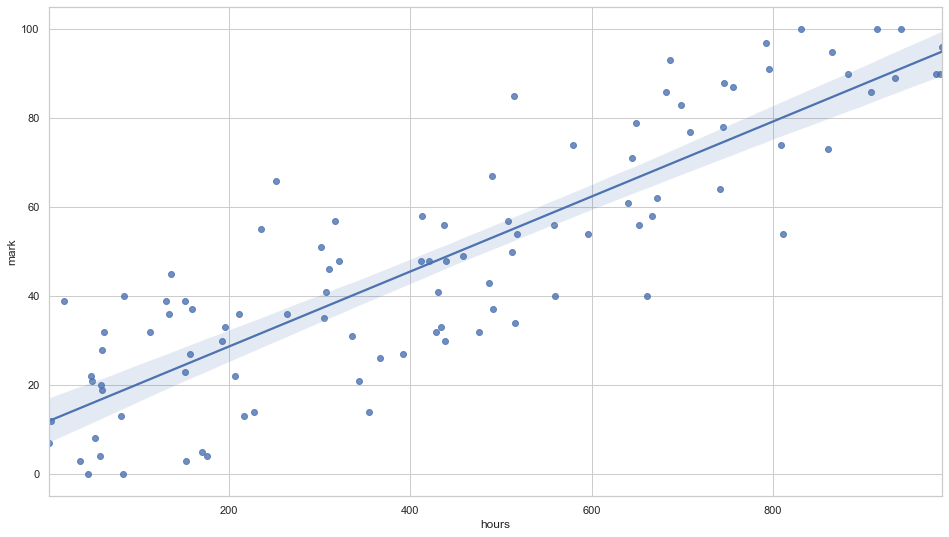

In [89]:
sns.regplot(x=data.hours, y=data.mark)

In [87]:
results = smf.ols('mark ~ hours', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mark   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     296.9
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           2.04e-31
Time:                        21:09:00   Log-Likelihood:                -404.06
No. Observations:                 100   AIC:                             812.1
Df Residuals:                      98   BIC:                             817.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7807      2.517      4.680      0.000       6.785      16.776
hours          0.0844      0.005     17.230      0.000       0.075       0.094
==============================================================================
Omnibus:                        3.288   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                1.926
Skew:                           0.010   Prob(JB):                        0.382
Kurtosis:                       2.320   Cond. No.                         931.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple linear regression

Of course, the hours one studies is not the only important factor to get good grades. We can think of IQ, for example, as another determining factor. In fact, we can generalize a linear model to have as many variables as we want:

 $$ Y = \beta_0 +  \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_2 X_m   + \epsilon$$


In [ ]:
# From the example in the previous class
beta_2 = -0.02    # party hours
beta_1 = 0.08     # hours of study
beta_0 = 11.75
num_points = 100
X_1 = np.random.normal(500, 200, num_points)
X_2 = np.random.normal(500, 200, num_points)


Y = (beta_0) + (beta_1 * X_1) + (beta_2 * X_2)  + (np.random.normal(loc=0,scale=5,size=num_points))

In [ ]:
data = pd.DataFrame({'grades': Y, 
                     'study_hours': X_1,
                     'party_hours': X_2})

In [ ]:
data

The coefficients of the multiple linear regression are computed similar to the simple linear regression case: they minimize:

$$RSS = \Sigma(y_i - \hat{y_i})^2$$


where:

 $$ \hat{y} = \hat{\beta_0} +  \hat{\beta_1 X_1} + \hat{\beta_2} X_2 + \dots + \hat{\beta_2} X_m$$


In [ ]:
sns.pairplot(data);

In [ ]:
# Create plot
hours = np.arange(0,1000)
iq = np.arange(80,120)

B1, B2 = np.meshgrid(hours, iq, indexing='xy')
Z = np.zeros((iq.size, hours.size))

for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =(beta_0 + B1[i,j]*beta_1 + B2[i,j]*beta_2)

fig = plt.figure()
fig.suptitle('Regression: grade ~ study_hours + party_hours', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, cmap=cm.coolwarm, alpha=0.01, )
ax.scatter3D(X_1, X_2, y , c='r', s=50)

ax.set_xlabel('study_hours')
ax.set_xlim(0,1000)
ax.set_ylabel('party_hours')
ax.set_ylim(ymin=0, ymax=1000)
ax.set_zlabel('grades');

In [ ]:
results = smf.ols('grades ~ study_hours + party_hours', data=data).fit()
results.summary()

# Take-home exercises

Using a dataset, try this hands-on exercise:

0. First, review what we've seen!

1. Load the data using pandas: `pd.read_csv('../data/Advertising.csv')`

2. Do a pairplot to investigate any correlations

3. Check your intuitions with the `.corr()` function of your dataset

4. Create a simple linear model using `scikit`'s `LinearRegression`

5. Create the same model using the library `statsmodels.formula.api` and compare results

# References: 

* [Introduction to Statistical Learning (Chapter 3)](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)